In [2]:
import higra as hg
import numpy as np
import cv2 as cv
import imageio.v2 as iio
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
img = iio.imread("../Images/0.jpg")
size = img.shape
img_s = cv.resize(img,(int(size[1]*0.2),int(size[0]*0.2)))
size_s = img_s.shape

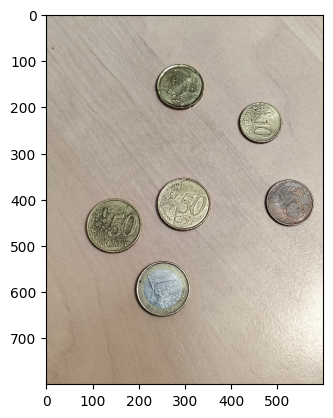

In [4]:
plt.imshow(img_s)

In [5]:
def euclidian_dist(vec1,vec2):
    return np.sqrt(
        np.sum(
            np.power(
                vec1.astype(np.int32) - # we cast to int32 to hold value as big as 255**2
                vec2.astype(np.int32),
                2),
            axis = 1
        ))

def compute_euclidian_dist_lab(im,graph):
    (source,target) = graph.edge_list()
    pixels_linear_array = cv.cvtColor(im, cv.COLOR_RGB2LAB).reshape(1,-1,3)[0]
    
    dist_array = euclidian_dist(pixels_linear_array[source],pixels_linear_array[target])
    return dist_array


In [6]:
graph = hg.get_4_adjacency_graph(np.array([size_s[0],size_s[1]]))
edge_weight = compute_euclidian_dist_lab(img_s,graph)

In [7]:
label = hg.labelisation_watershed(graph,edge_weight)

In [10]:
label

array([[     1,      1,      2, ...,    263,    264,    264],
       [     1,    265,    265, ...,    399,    399,    264],
       [   400,    400,    400, ...,    538,    538,    538],
       ...,
       [121846, 122133, 122293, ..., 122451, 122292, 122292],
       [122452, 122452, 122452, ..., 122451, 122611, 122611],
       [122612, 122612, 122452, ..., 122451, 122611, 122611]])

In [14]:
tree, altitudes = hg.watershed_hierarchy_by_dynamics(graph, edge_weight)

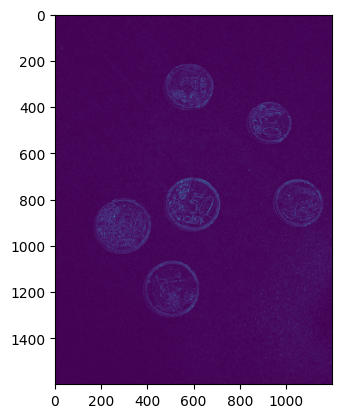

In [15]:
saliency = hg.saliency(tree, altitudes)
plt.imshow(hg.graph_4_adjacency_2_khalimsky(graph, saliency))

In [16]:
def is_non_relevant(tree, altitudes):
    area = hg.attribute_area(tree)
    min_area_children = hg.accumulate_parallel(tree, area, hg.Accumulators.min)
    return min_area_children <= 100

filtered_tree, filtered_altitudes = hg.filter_non_relevant_node_from_tree(tree, altitudes, is_non_relevant)

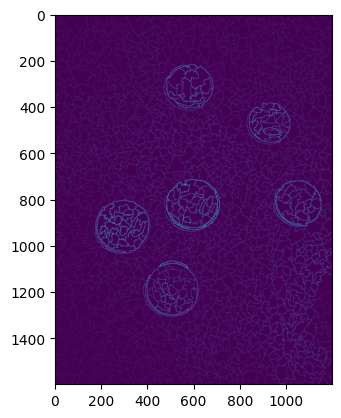

In [17]:
saliency = hg.saliency(filtered_tree, filtered_altitudes)
plt.imshow(hg.graph_4_adjacency_2_khalimsky(graph, saliency))